# Regresión de vectores de apoyo (SVR)

## Importar las librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importar el conjunto de datos


In [2]:
datos = pd.read_csv('.\datos\Position_Salaries.csv')
datos.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
X = datos.iloc[:, 1:-1].values
y = datos.iloc[:, -1].values

In [4]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [5]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [6]:
y = y.reshape(len(y),1)

In [7]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Escalamiento o Normalización

In [8]:
from sklearn.preprocessing import StandardScaler
normalizador_X = StandardScaler()
normalizador_y = StandardScaler()
X = normalizador_X.fit_transform(X)
y = normalizador_y.fit_transform(y)

In [9]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [10]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Entrenamiento del modelo SVR model con todos los datos

In [11]:
from sklearn.svm import SVR
regresor = SVR(kernel = 'rbf')
regresor.fit(X, y)

c:\Users\crist\OneDrive\Documents\GitHub\MineriaDeDatos\.env\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicción de un resultado nuevo

In [12]:
normalizador_y.inverse_transform(regresor.predict(normalizador_X.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

## Visualización de los resultados de SVR

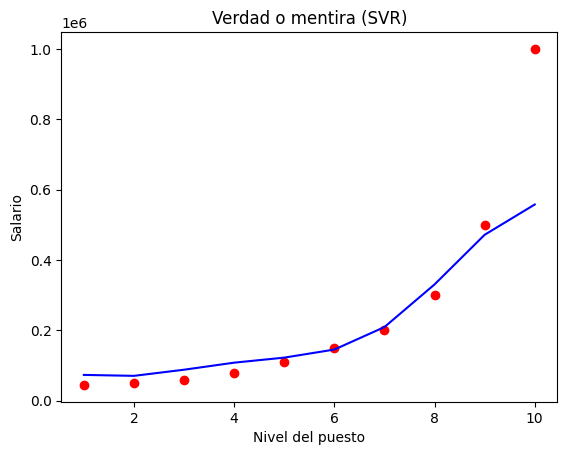

In [13]:
plt.scatter(normalizador_X.inverse_transform(X), normalizador_y.inverse_transform(y), color = 'red')
plt.plot(normalizador_X.inverse_transform(X), normalizador_y.inverse_transform(regresor.predict(X).reshape(-1,1)), color = 'blue')
plt.title('Verdad o mentira (SVR)')
plt.xlabel('Nivel del puesto')
plt.ylabel('Salario')
plt.show()

## Visualización de los resultados de results (para una curva de mayor resolución)

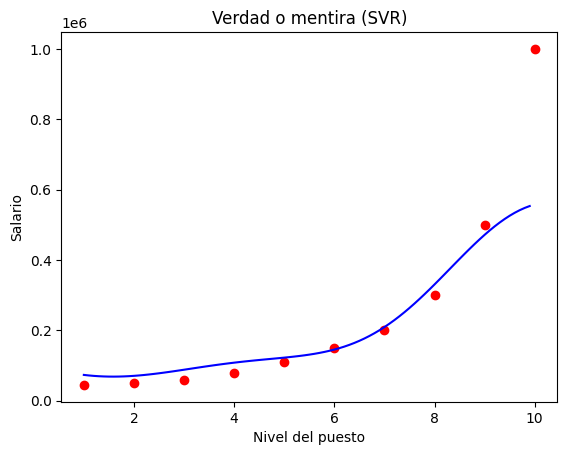

In [14]:
X_malla = np.arange(min(normalizador_X.inverse_transform(X)), max(normalizador_X.inverse_transform(X)), 0.1)
X_malla = X_malla.reshape((len(X_malla), 1))
plt.scatter(normalizador_X.inverse_transform(X), normalizador_y.inverse_transform(y), color = 'red')
plt.plot(X_malla, normalizador_y.inverse_transform(regresor.predict(normalizador_X.transform(X_malla)).reshape(-1,1)), color = 'blue')
plt.title('Verdad o mentira (SVR)')
plt.xlabel('Nivel del puesto')
plt.ylabel('Salario')
plt.show()